

# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

Cinema is a global art. Finding characteristics of best movies is the goal of this investigation. [TMDB movies dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) contains information about 10,000 movies from 1960 to 2015.

Dataset contains 10866 samples with following 21 features:

| Feature | Description |
| ----------- | ----------- |
| id | movie id |
| imdb_id | unique identifier for each movie |
| popularity | A numeric quantity specifying the movie popularity |
| budget | The budget in which the movie was made |
| revenue | The worldwide revenue generated by the movie |
| original_title | The title of the movie before translation or adaptation |
| cast | The name of lead and supporting actors |
| homepage | A link to the homepage of the movie |
| director | movie director |
| tagline |  Movie's tagline |
| keywords | The keywords or tags related to the movie |
| overview | A brief description of the movie |
| runtime | The running time of the movie in minutes |
| genres | The genre of the movie, Action, Comedy ,Thriller etc |
| production_companies | The production house of the movie |
| release_date | The date on which it was released |
| vote_count | the count of votes recieved |
| vote_average | average ratings the movie recieved |
| release_year | The year on which it was released |
| budget_adj | movie budget terms of 2010 dollars, accounting for inflation over time |
| revenue_adj | revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time |

This investigation analyzes:

- **4 independent variables:** [*genres, release_year,budget_adj, director*]

- **1 dependent variable:** [*revenue_adj*]

The goal of this investigation is to answer these questions:

- **Which genres are most popular from year to year?**

- **Does the new filming technology have an impact on movies revenue and production rate?**

- **What kinds of properties are associated with movies that have high revenues?**


In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, these steps will be applied:

- Loading data.

- Drop non-relevant features.

- Check data clealiness.

- Modifying/adding some features.

### General Properties

In [2]:
# Load data 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Dataset shape
print('Dataset contains: {} rows,  {} columns'.format(df.shape[0], df.shape[1]))

Dataset contains: 10866 rows,  21 columns


In [4]:
# Dataset columns:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### * Drop non-relevant columns, Foucs on:

[imdb_id, genres, release_year, production_companies, budget_adj, revenue_adj, vote_average]

In [5]:
kept_columns = ['imdb_id', 'genres', 'release_year', 'budget_adj', 'revenue_adj', 'director']
for col in df.columns:
    if col not in kept_columns:
        df.drop(col, axis=1, inplace=True)

In [6]:
# check dataset shape
df.shape

(10866, 6)

#### * Check columns info:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       10856 non-null  object 
 1   director      10822 non-null  object 
 2   genres        10843 non-null  object 
 3   release_year  10866 non-null  int64  
 4   budget_adj    10866 non-null  float64
 5   revenue_adj   10866 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 509.5+ KB


column: **genres** has missing values. 

As this feature is important for this analysis, **so null values will be droped**

#### * Drop null values:

In [8]:
df.dropna(inplace=True)

In [9]:
# make sure all rows have values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       10796 non-null  object 
 1   director      10796 non-null  object 
 2   genres        10796 non-null  object 
 3   release_year  10796 non-null  int64  
 4   budget_adj    10796 non-null  float64
 5   revenue_adj   10796 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 590.4+ KB


#### * check for duplicated rows:

In [10]:
df.duplicated().sum()

1

In [11]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [12]:
# new shape
df.shape

(10795, 6)

In [13]:
df.head()

,imdb_id,director,genres,release_year,budget_adj,revenue_adj
0,tt0369610,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,tt1392190,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,tt2908446,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,tt2488496,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,tt2820852,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


#### * Inspect genres values:

In [14]:
df['genres'].value_counts()

Drama                                             711
Comedy                                            707
Documentary                                       306
Drama|Romance                                     289
Comedy|Drama                                      280
                                                 ... 
Action|Comedy|Drama|Romance|War                     1
Drama|Crime|War                                     1
TV Movie|Comedy|Family|Adventure                    1
Action|Adventure|Drama|Fantasy|Science Fiction      1
Comedy|Documentary|Foreign                          1
Name: genres, Length: 2029, dtype: int64

In [15]:
# find uniqe genres types
genres_list = df['genres'].tolist()
genres_set = set()
for item in genres_list:
    genres_set.update(item.split('|'))
    
print(len(genres_set))
print(genres_set)

20
{'Documentary', 'Animation', 'Action', 'Fantasy', 'Adventure', 'Thriller', 'Science Fiction', 'Foreign', 'Mystery', 'War', 'Western', 'Romance', 'Comedy', 'Crime', 'History', 'TV Movie', 'Music', 'Horror', 'Family', 'Drama'}


In [16]:
# adding 20 genres types as boolen columns
for genre_type in genres_set:
    column_name = 'genre_{}'.format(genre_type.lower())
    df[column_name] = df['genres'].str.contains(genre_type)
    df[column_name] = df[column_name].astype(int)

In [17]:
df.shape

(10795, 26)

In [18]:
df.drop('genres', axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                10795 non-null  object 
 1   director               10795 non-null  object 
 2   release_year           10795 non-null  int64  
 3   budget_adj             10795 non-null  float64
 4   revenue_adj            10795 non-null  float64
 5   genre_documentary      10795 non-null  int64  
 6   genre_animation        10795 non-null  int64  
 7   genre_action           10795 non-null  int64  
 8   genre_fantasy          10795 non-null  int64  
 9   genre_adventure        10795 non-null  int64  
 10  genre_thriller         10795 non-null  int64  
 11  genre_science fiction  10795 non-null  int64  
 12  genre_foreign          10795 non-null  int64  
 13  genre_mystery          10795 non-null  int64  
 14  genre_war              10795 non-null  int64  
 15  ge

In [20]:
df.head()

,imdb_id,director,release_year,budget_adj,revenue_adj,genre_documentary,genre_animation,genre_action,genre_fantasy,genre_adventure,...,genre_western,genre_romance,genre_comedy,genre_crime,genre_history,genre_tv movie,genre_music,genre_horror,genre_family,genre_drama
0,tt0369610,Colin Trevorrow,2015,1.379999e+08,1.392446e+09,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt1392190,George Miller,2015,1.379999e+08,3.481613e+08,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,tt2908446,Robert Schwentke,2015,1.012000e+08,2.716190e+08,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,tt2488496,J.J. Abrams,2015,1.839999e+08,1.902723e+09,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,tt2820852,James Wan,2015,1.747999e+08,1.385749e+09,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


In [21]:
# dataset summary statistics
df.describe()

,release_year,budget_adj,revenue_adj,genre_documentary,genre_animation,genre_action,genre_fantasy,genre_adventure,genre_thriller,genre_science fiction,...,genre_western,genre_romance,genre_comedy,genre_crime,genre_history,genre_tv movie,genre_music,genre_horror,genre_family,genre_drama
count,10795.000000,1.079500e+04,1.079500e+04,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,...,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000,10795.000000
mean,2001.285966,1.766255e+07,5.170107e+07,0.047151,0.063918,0.219824,0.084206,0.135618,0.269013,0.112923,...,0.015192,0.158221,0.350347,0.125336,0.030755,0.015007,0.037239,0.151552,0.113201,0.440204
std,12.821353,3.438989e+07,1.450475e+08,0.211973,0.244619,0.414146,0.277709,0.342399,0.443467,0.316513,...,0.122323,0.364965,0.477101,0.331115,0.172661,0.121586,0.189357,0.358602,0.316852,0.496435
min,1960.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,2.103337e+07,3.409994e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2015.000000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


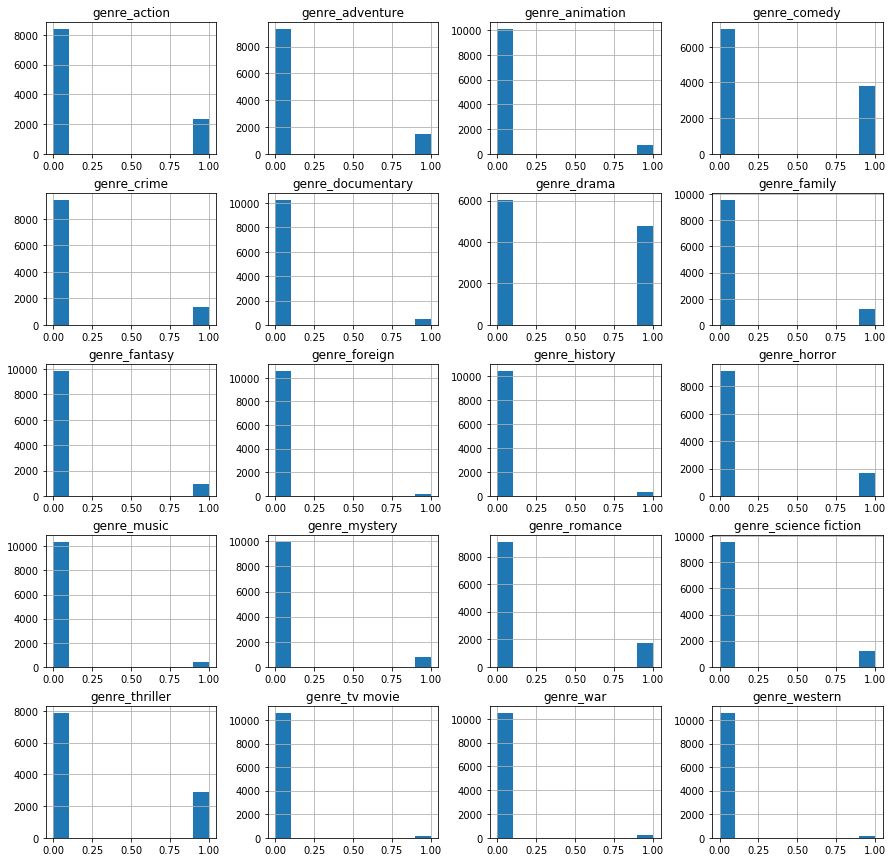

In [22]:
# distribution of each genre type
df.filter(regex=("genre_.*")).hist(figsize=(15, 15));

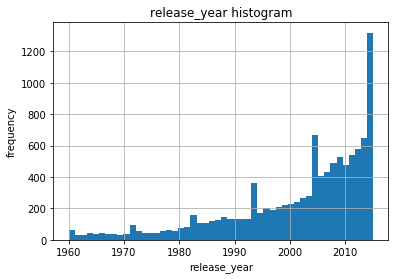

In [46]:
# movies prouction per year
df['release_year'].hist(bins=50);
plt.xlabel('release_year')
plt.ylabel('frequency')
plt.title('release_year histogram');

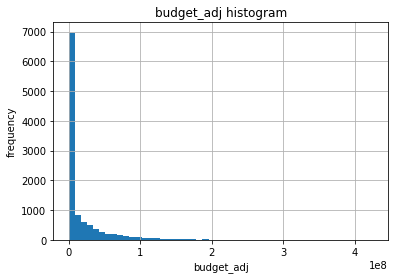

In [45]:
df['budget_adj'].hist(bins=50);
plt.xlabel('budget_adj')
plt.ylabel('frequency')
plt.title('budget_adj histogram');

#### budget_adj distribution is right-skewed

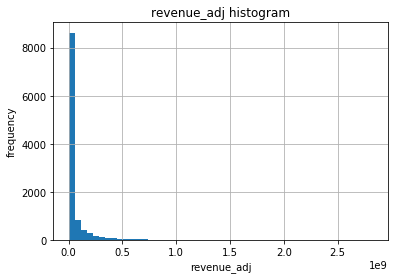

In [44]:
# revenue distribution
df['revenue_adj'].hist(bins=50);
plt.xlabel('revenue_adj')
plt.ylabel('frequency')
plt.title('revenue_adj histogram');

#### revenue_adj distribution is right-skewed

------------------------------------------------------------------------------------------------------------------
#### - director impact on revenue

In [26]:
top_directors = df['director'].value_counts()
top_directors

Woody Allen                                  45
Clint Eastwood                               34
Steven Spielberg                             29
Martin Scorsese                              29
Ridley Scott                                 23
                                             ..
Jorge Blanco|Javier Abad|Marcos MartÃ­nez     1
Bruce D. Clark                                1
Jessica Bendinger                             1
Erik White                                    1
Kevin Heffernan                               1
Name: director, Length: 5054, dtype: int64

In [27]:
df.groupby('director').revenue_adj.sum().sort_values(ascending=False)

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
                        ...     
Jeppe RÃ¸nde        0.000000e+00
Jens Hoffmann       0.000000e+00
Jenniphr Goodman    0.000000e+00
Rob Williams        0.000000e+00
Giorgia Farina      0.000000e+00
Name: revenue_adj, Length: 5054, dtype: float64

#### factorize director column

In [28]:
labels, uniques = pd.factorize(df['director'])
df['director'] = labels

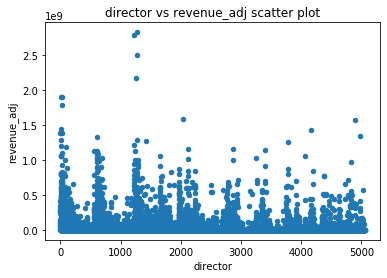

In [42]:
# scatter plot director vs revenue
df.plot(x='director', y='revenue_adj', kind='scatter' );
plt.title('director vs revenue_adj scatter plot');

#### Director impact on revenue for same genre type and release year:

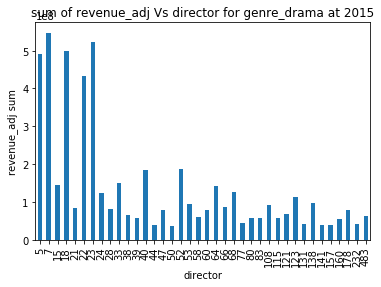

In [47]:
df[(df['genre_drama'] > 0) & (df['revenue_adj'] > df['revenue_adj'].quantile(0.75)) & (df['release_year'] == 2015)].groupby('director').revenue_adj.sum().plot.bar();
plt.xlabel('director')
plt.ylabel('revenue_adj sum')
plt.title('sum of revenue_adj Vs director for genre_drama at 2015');

#### Scatter Matrix:

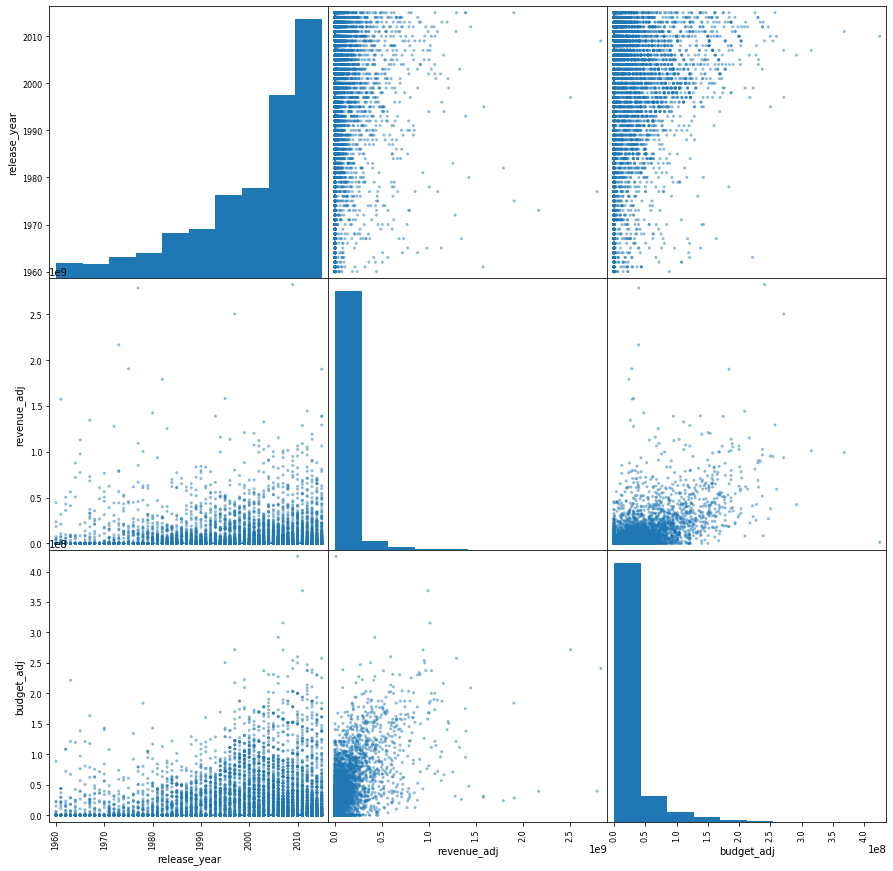

In [31]:
pd.plotting.scatter_matrix(df[['release_year', 'revenue_adj', 'budget_adj']], figsize=(15,15));

### Research Question 1: Which genres are most popular from year to year?

In [32]:
# count & sort genres types
popular_genres = df.filter(regex=("genre_.*")).sum().sort_values(ascending=False)
popular_genres

genre_drama              4752
genre_comedy             3782
genre_thriller           2904
genre_action             2373
genre_romance            1708
genre_horror             1636
genre_adventure          1464
genre_crime              1353
genre_family             1222
genre_science fiction    1219
genre_fantasy             909
genre_mystery             809
genre_animation           690
genre_documentary         509
genre_music               402
genre_history             332
genre_war                 270
genre_foreign             185
genre_western             164
genre_tv movie            162
dtype: int64

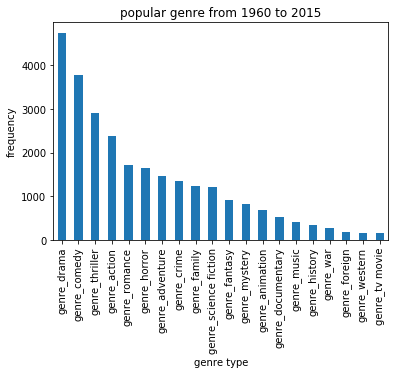

In [48]:
# plot popular genres types
popular_genres.plot(kind='bar');
plt.xlabel('genre type')
plt.ylabel('frequency')
plt.title('popular genre from 1960 to 2015');

#### This indicates that:

**Top 3 popular genres from year to year are: Drame, Comedy and thriller.**


### Research Question 2 : Does the new filming technology have an impact on movie revenue and production rate?

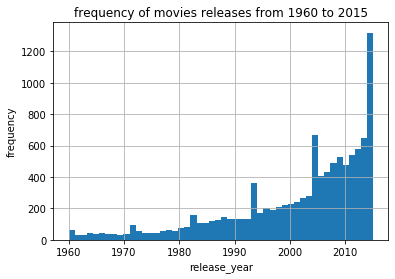

In [49]:
# movies prouction per year
df['release_year'].hist(bins=50);
plt.xlabel('release_year')
plt.ylabel('frequency')
plt.title('frequency of movies releases from 1960 to 2015');

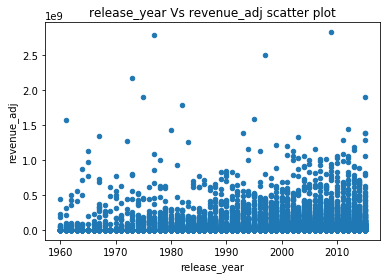

In [50]:
df.plot(x='release_year', y='revenue_adj', kind='scatter');
plt.title('release_year Vs revenue_adj scatter plot');

#### It's clear that as new filming technologies are improved, the rate of production rate inscreases, and the revenue inscreases.

### Research Question 3 : What kinds of properties are associated with movies that have high revenues?


#### From previous visuals, it seems that following features are associated with high revenue movies :

- genres types: Drame, Comedy and thriller genres are associated with high reveneu 
- director: some directors has high impact than others for the same genre type
- release_year: affects movie revenue as recent movies have higher revenues

<a id='conclusions'></a>
## Conclusions

###  Results Summary:

1- This analysis focus on 5 features of the original dataset:

- independent variables: [**genres, release_year,budget_adj, director**]

- dependent variable: [**revenue_adj**] 

2- It's found that Top 3 popular genres from year to year are: **Drame, Comedy and thriller**.

3- It's found that filming technology has an impact on movies quiality and production rate.

4- It's found that director has a remarkable impact on movie sucess and revenue.

### Limitations:

1- Although dataset has enough observations and covers a wide range time, but it needs more features to make a solid conclusion.

2- Columns such as **"generes"** and **"director"** contain multiple values separated by pipe (|) characters. So they needed some processing like factorize and feature engineering. 

3- These feature engineering and factorize are important step for good visualization.

4- Columns of **"budget_adj"** and **"revenue_adj"** don't give a clear insight, as distribution of both are extremely right-skewed.